# What is machine learning?

One definition: "Machine learning is the semi-automated extraction of knowledge from data"

- **Knowledge from data**: Starts with a question that might be answerable using data
- **Automated extraction**: A computer provides the insight
- **Semi-automated**: Requires many smart decisions by a human

## What are the two main categories of machine learning?

**Supervised learning**: Making predictions using data
    
- Example: Is a given email "spam" or "ham"?
- There is an outcome we are trying to predict

**Unsupervised learning**: Extracting structure from data

- Example: Segment grocery store shoppers into clusters that exhibit similar behaviors
- There is no "right answer"

# Start with supervised learning

## Types of supervised learning

- **Classification:** Predict a categorical response
- **Regression:** Predict a continuous response

In [2]:
import pandas as pd
# read CSV file directly from a URL and save the results
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
 
# display the first 5 rows
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
data.shape

(200, 4)

What are the features?
- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

What is the response?
- **Sales:** sales of a single product in a given market (in thousands of items)

What else do we know?
- Because the response variable is continuous, this is a **regression** problem.
- There are 200 **observations** (represented by the rows), and each observation is a single market.

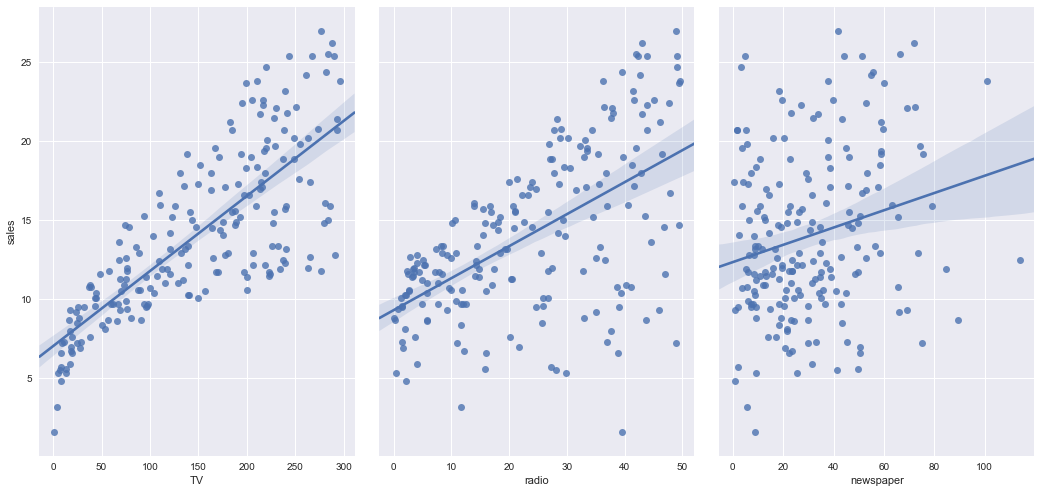

In [3]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', size=7, aspect=0.7, kind='reg')


## Linear regression

**Pros:** fast, no tuning required, highly interpretable, well-understood

**Cons:** unlikely to produce the best predictive accuracy (presumes a linear relationship between the features and response)

### Form of linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

The $\beta$ values are called the **model coefficients**. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

In [45]:
feature_cols = ['TV', 'radio', 'newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# equivalent command to do this in one line
X = data[['TV', 'radio', 'newspaper']]

# print the first 5 rows
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [46]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [47]:
# select a Series from the DataFrame
y = data['sales']

# equivalent command that works if there are no spaces in the column name
y = data.sales

# print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [48]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


### Splitting X and y into training and testing sets

In [49]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [50]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


## Linear regression in scikit-learn

In [51]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Interpreting model coefficients

In [52]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [53]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('TV', 0.046564567874150281),
 ('radio', 0.17915812245088836),
 ('newspaper', 0.0034504647111804347)]

### Making predictions

In [54]:
y_pred = linreg.predict(X_test)
print(y_pred)

[ 21.70910292  16.41055243   7.60955058  17.80769552  18.6146359
  23.83573998  16.32488681  13.43225536   9.17173403  17.333853
  14.44479482   9.83511973  17.18797614  16.73086831  15.05529391
  15.61434433  12.42541574  17.17716376  11.08827566  18.00537501
   9.28438889  12.98458458   8.79950614  10.42382499  11.3846456
  14.98082512   9.78853268  19.39643187  18.18099936  17.12807566
  21.54670213  14.69809481  16.24641438  12.32114579  19.92422501
  15.32498602  13.88726522  10.03162255  20.93105915   7.44936831
   3.64695761   7.22020178   5.9962782   18.43381853   8.39408045
  14.08371047  15.02195699  20.35836418  20.57036347  19.60636679]


We need an **evaluation metric**  in order to compare our predictions with the actual values!

### Evaluation metric

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [55]:
from sklearn import metrics
import numpy as np

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.40465142303


# Classifications on the iris dataset

- Framed as a **supervised learning** problem: Predict the species of an iris using the measurements
- Famous dataset for machine learning because prediction is **easy**
- Learn more about the iris dataset: [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Iris)

In [56]:
# import load_iris function from datasets module
from sklearn.datasets import load_iris
iris = load_iris()
type(iris)

sklearn.datasets.base.Bunch

In [57]:
# print the iris data
print(iris.feature_names)
print(len(iris.data))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
150


In [58]:
# print integers representing the species of each observation
print(iris.target)
print(len(iris.target))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
150


In [59]:
# print the encoding scheme for species: 0 = setosa, 1 = versicolor, 2 = virginica
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [60]:
X = iris.data

# store response vector in "y"
y = iris.target


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(90, 4)
(60, 4)
(90,)
(60,)


## Logistic regression
For iris dataset, we are predicting a categorical data. Linear Regression is not a good choice, instead we use logistic regression. 


In [63]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(y_pred)

[2 0 2 2 2 1 2 0 0 1 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2 2 0 2 0 1 2 2
 1 1 0 2 0 1 0 2 0 0 1 1 2 0 1 2 2 1 1 0 1 2 1]


## Evaluation metric

### Classification accuracy:
- Proportion of correct predictions
- Common evaluation metric for classification problems

In [64]:
print(metrics.accuracy_score(y_test, y_pred))

0.95


## Alternatives: Support Vector Machine

Support Vector Machines (SVMs) are a powerful supervised learning algorithm used for **classification**. SVMs draw a boundary between clusters of data.  SVMs attempt to maximize the margin between sets of points.  Many lines can be drawn to separate the points above:

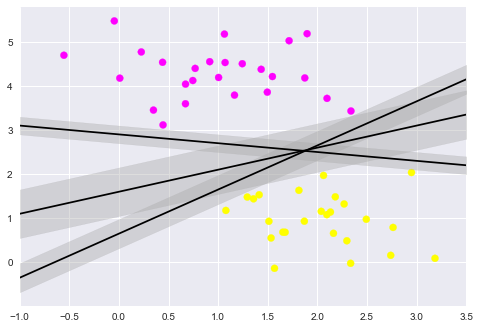

In [72]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; 
from scipy import stats
import pylab as pl

seaborn.set()
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

# Draw three lines that couple separate the data
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

### Apply SVM to iris

In [73]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(90, 4)
(60, 4)
(90,)
(60,)


In [74]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [75]:
y_pred=clf.predict(X_test)
print(y_pred)

[2 0 2 2 2 1 2 0 0 2 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2 1 0 2 0 1 2 2
 1 1 0 2 0 1 0 2 0 0 1 1 2 0 1 2 2 1 1 0 1 2 1]


In [76]:
print(metrics.accuracy_score(y_test, y_pred))

0.983333333333


## Supervised Learning In-Depth: Random Forests

Previously we saw a powerful discriminative classifier, **Support Vector Machines**.
Here we'll take a look at motivating another powerful algorithm. This one is a *non-parametric* algorithm called **Random Forests**.

### Example: Random Forest for Classifying Digits

Let's start with the **hand-written digits** data. Let's use that here to test the efficacy of Random Forest classifiers.

In [11]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [12]:
X = digits.data
y = digits.target
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


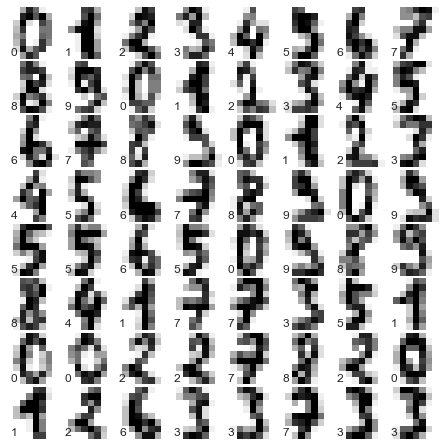

In [13]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))


### Motivating Random Forests: Decision Trees
Random forests are an example of an *ensemble learner* built on decision trees.
For this reason we'll start by discussing decision trees themselves.



In [14]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
clf = DecisionTreeClassifier(max_depth=11)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

C:\Users\Miao\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
metrics.accuracy_score(ypred, ytest)

0.84444444444444444

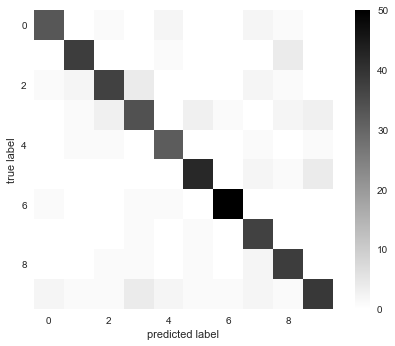

In [16]:
plt.imshow(metrics.confusion_matrix(ypred, ytest),
           interpolation='nearest', cmap=plt.cm.binary)
plt.grid(False)
plt.colorbar()
plt.xlabel("predicted label")
plt.ylabel("true label");

In [18]:
from sklearn.ensemble import RandomForestClassifier

### Ensemble the decision tress: Random Forest

In [19]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

In [20]:
metrics.accuracy_score(ypred, ytest)

0.93999999999999995

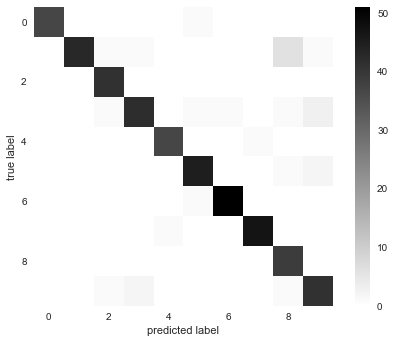

In [21]:
plt.imshow(metrics.confusion_matrix(ypred, ytest),
           interpolation='nearest', cmap=plt.cm.binary)
plt.grid(False)
plt.colorbar()
plt.xlabel("predicted label")
plt.ylabel("true label");

## Unsupervised learning

## Introducing K-Means

K Means is an algorithm for **unsupervised clustering**: that is, finding clusters in data based on the data attributes alone (not the labels).

K Means is a relatively easy-to-understand algorithm.  It searches for cluster centers which are the mean of the points within them, such that every point is closest to the cluster center it is assigned to.

Let's look at how KMeans operates on the simple clusters we looked at previously. To emphasize that this is unsupervised, we'll not plot the colors of the clusters:

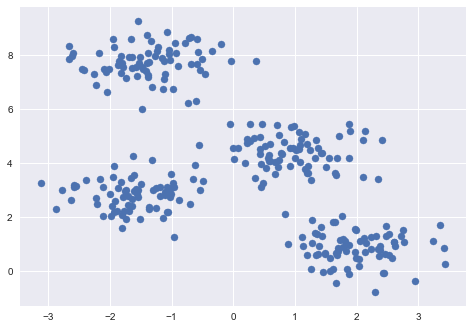

In [77]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], s=50);

By eye, it is relatively easy to pick out the four clusters. If you were to perform an exhaustive search for the different segmentations of the data, however, the search space would be exponential in the number of points. Fortunately, there is a well-known *Expectation Maximization (EM)* procedure which scikit-learn implements, so that KMeans can be solved relatively quickly.

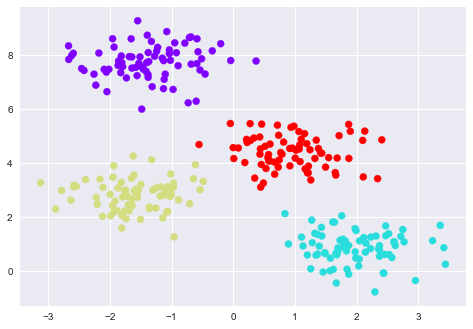

In [78]:
from sklearn.cluster import KMeans
est = KMeans(4)  # 4 clusters
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow');

Let's use scikit-learn for K-means clustering on Iris dataset

In [85]:
from sklearn import datasets, cluster
import numpy as np
import matplotlib.pyplot as plt


In [80]:
np.random.seed(2)

In [81]:
# load data
iris = datasets.load_iris()

X_iris = iris.data
y_iris = iris.target

In [82]:
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X_iris) 
labels = k_means.labels_

In [83]:
# check how many of the samples were correctly labeled
correct_labels = sum(y_iris == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y_iris.size))

Result: 134 out of 150 samples were correctly labeled.


## Introducing Principal Component Analysis
Principal Component Analysis is a very powerful unsupervised method for dimensionality reduction in data. It's easiest to visualize by looking at a two-dimensional dataset:

In [86]:
from __future__ import print_function, division

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting style defaults

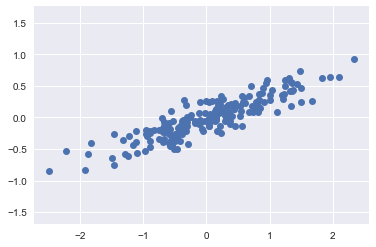

In [87]:
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal');

We can see that there is a definite trend in the data. What PCA seeks to do is to find the **Principal Axes** in the data, and explain how important those axes are in describing the data distribution:

In [88]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_)
print(pca.components_)

[ 0.75871884  0.01838551]
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


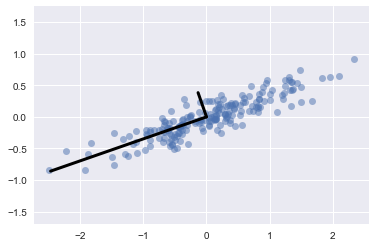

In [89]:
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');